![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
#%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [47]:
# Importación de librerías adicionales

import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})

In [6]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [8]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

             count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0


<AxesSubplot:xlabel='workingday', ylabel='total'>

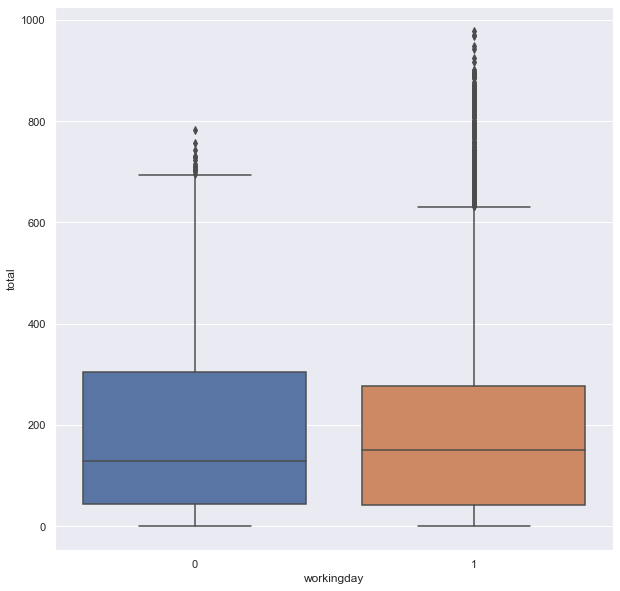

In [48]:
print(bikes.groupby('workingday').total.describe())

sns.boxplot(data = bikes, x = 'workingday', y = 'total')

      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.674725  127.444294  10.0  123.00  183.0  265.50

<AxesSubplot:xlabel='hour', ylabel='total'>

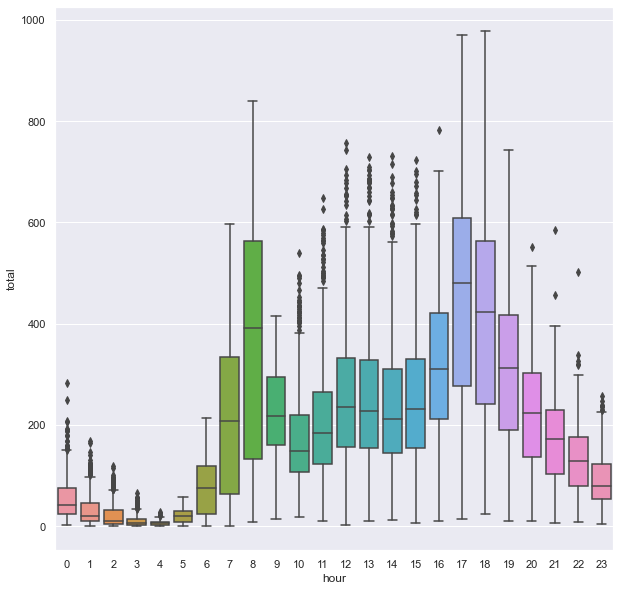

In [49]:
# Celda 1.2
print(bikes.groupby('hour').total.describe())
sns.boxplot(data = bikes, x = 'hour', y = 'total')


<AxesSubplot:xlabel='hour', ylabel='total'>

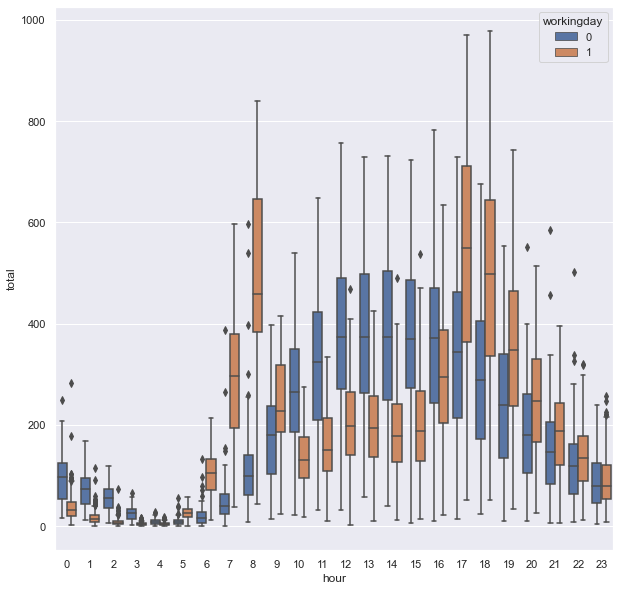

In [50]:
sns.boxplot(data = bikes, x = 'hour', y = 'total', hue = 'workingday')

#### Desarrollo
---------

- Inicialmente, se percibe a través de los descriptores estadísticos de la variable 'workingday' que NO hay una diferencia significativa entre el total de biciceltas rentadas entre los días feriados y los laborales.  

- La descripción estadistica de la variable 'hour' permite evidenciar una significativa diferencia entre la cantidad de bicicletas rentadas entre las distintas franjas horarias, por ejemplo, se hace notorio que existen horas con mayor demanda que otras, por ejemplo, el period entre las 08 y las 18 es aquel en donde hay mayor renta de bicicletas, y específicamente los límites inferior y superior de este rango es donde se encuentra la moda.

- Un cruce entre dichas variables permite evidenciar que hay una dependencia de la cantidad de biciletas rentadas en una hora específica del día y si ese día corresponde a feriado o laboral. Este análisis permite evidenciar que en dias laborales, las horas en donde se produce una mayor renta de bicicletas son aquellas entre las 06 y 07 y entre las 16 y las 19, lo cual probablemente corresponde a las horas de ingreso y salida de trabajo.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

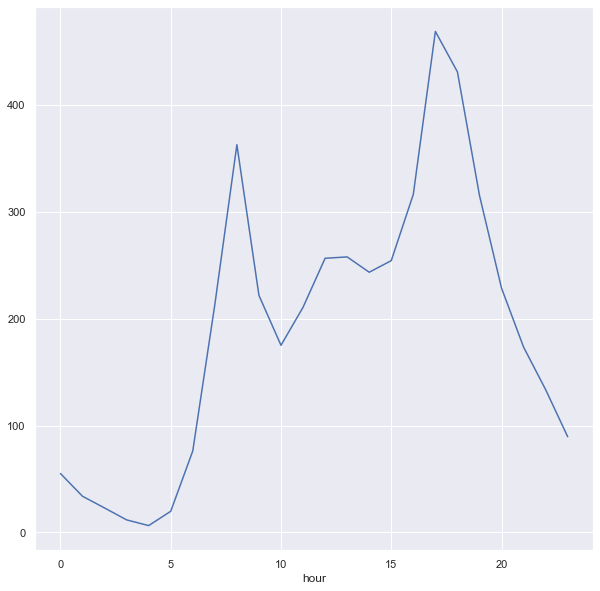

In [81]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

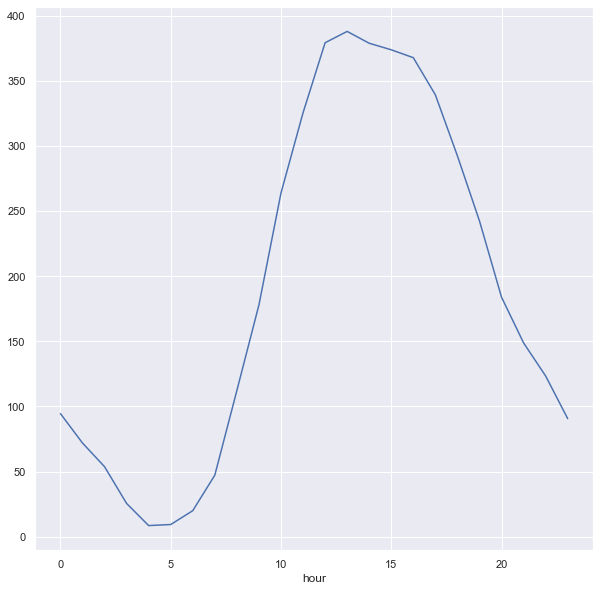

In [95]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 

filter = bikes.workingday == 0
bikes[filter].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

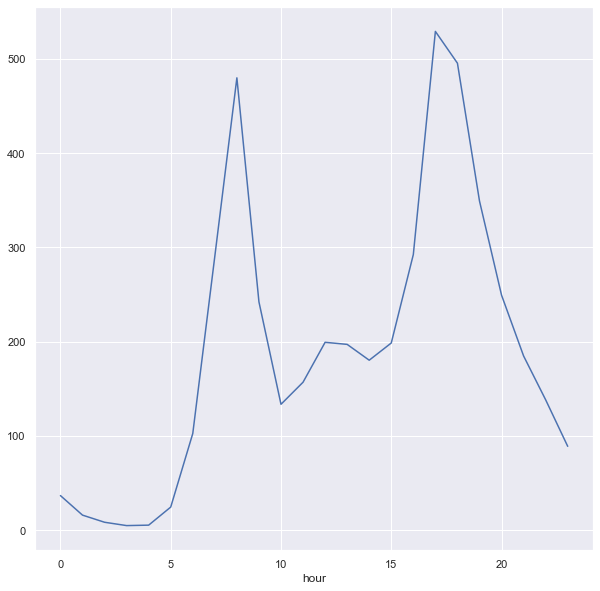

In [96]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 

filter = bikes.workingday =3e2= 1
bikes[filter].groupby('hour').total.mean().plot()

###### Desarrollo
---------

Como se planteó en el desarrollo del punto anterior, se puede evidenciar una diferencia en los hábitos de renta de bicicletas entre los días laborales y los feriados.

Mientras para los días laborales se observa un comportamiento bimodal en la cantidad promedio de renta de bicicletas, cuyos valores más altos se encuentran en las horas cercanas a las 07 y las 17, para el caso de los días feriados, se observa que la mayor demanda se encuentra en las horas comprendidas entre las 10 y las 17, 

Esto permite plantear la hipótesis que existe una diferencia en la demanda de renta de bicicletas de acuerdo al si el día corresponde a laboral o feriado.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [118]:
# Celda 3
X_Total = bikes[['workingday', 'hour']]
Y_Total = bikes['total']

reg = LinearRegression()
reg.fit(X_Total, Y_Total)

reg.coef_

array([ 4.07248627, 10.49206282])

In [135]:
y_pred = reg.predict(X_Total)
MSE = np.mean((y_pred - Y_Total.values)**2)
MSE

27541.255252498395

###### Desarrollo
---------
Los coeficientes del problema de regresión son 

$4.072 * workingday$ Lo cual indica que para un día laboral hay un aumento de 4.072 en el total de alquiler de las bicicletas

$10.492 * Hour$
Lo cual indica que cada hora el alquiler de bicicletas aumenta en 10.492 unidades.

La regresión lineal se encuentra limitado dado que no permite modelar las fluctuaciones temporales de la demanda de alquiler de bicicletas en las diferentes horas y la dependencia entre las variables 'hour' y 'workingday'. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [124]:
# Celda 4



### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [155]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
MSE_score = []

# Se separa el conjunto de datos de pruebas y entrenamiento
XTrain, XTest, yTrain, yTest = train_test_split(X_Total, Y_Total, test_size=0.30, random_state=0)

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    clf.fit(XTrain, yTrain)
    
    #Se calculan las predicciones y se obtiene el MSE de cada iteración en la profundidad del árbol
    y_pred = clf.predict(XTest)
    MSE_i = np.mean((y_pred-yTest.values)**2)  #MSE en test
    MSE_score.append(MSE_i)

# Se define como mejor predictor el arbol de decisión con aquel 'depth' que minimiza el MSE del modelo.     
best_tree = np.argmin(MSE_score)

print("Se entrena un arbol con el criterio de parada de máxima profundidad (max_depth) = ",max_depth_range[best_tree]," con el cual se obtiene un valor de MSE de ",MSE_score[best_tree])

clf = DecisionTreeClassifier(max_depth= max_depth_range[best_tree], random_state=1)

Se entrena un arbol con el criterio de parada de máxima profundidad (max_depth) =  9  con el cual se obtiene un valor de MSE de  19631.846601347213


###### Desarrollo
---------
Se entrena un arbol de decisión usando como parámetro de calibración el argumento max_depth, usando el MSE como métrica de desempeño de cada modelo de regresión.

Se obtiene que para un max_depth = 9 se obtiene el menor valor del MSE y por tanto el modelo con mejor capacidad predictiva dentro de los evaluados, para este caso específico, corresponde a 19631.85, valor significativamente menor al obtenido en el modelo de regresión lineal construido en el punto 3, cuyo MSE es de 27541.25. Lo cual demuestra que para el caso de este ejercicio, la construcción de un modelo de árbol de decisión para predecir el total de las bicicletas rentadas a partir de las variables 'hour' y 'workingday' resulta significativamente mejor que un modelo de regresión lineal.

<AxesSubplot:>

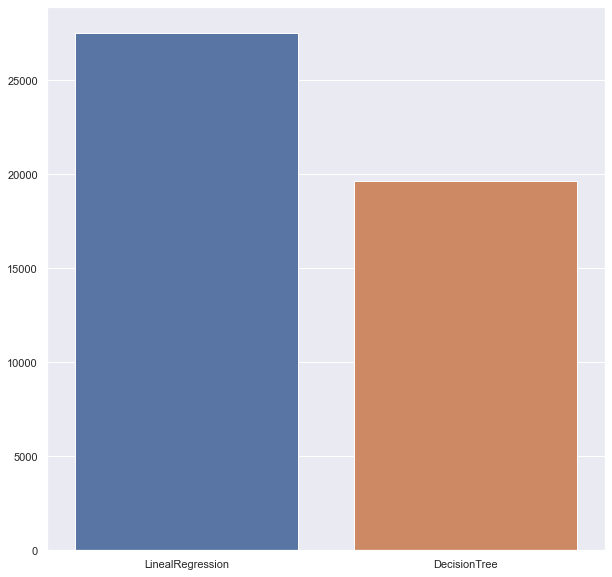

In [145]:
sns.barplot(x = ['LinealRegression', 'DecisionTree'], y = [MSE,accuracy_scores[best_tree]])

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [146]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [147]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [148]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [179]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [197]:
# Celda 6

# A. ÁRBOL DE DECISIÓN

# Se calibrará el modelo a partir del parámetro max_features

max_features_range = range(1, X_train.shape[1])
accuracy = []

# Se itera entre la totalidad de features del dataset
for features in max_features_range:
    
    dt_clf = DecisionTreeClassifier(random_state = 0, max_features = features)
    dt_clf.fit(X_train, y_train)
    dt_pred = dt_clf.predict(X_test)
    
    # Se obtiene el Accuracy, que será usado como métrica de selección del mejor modelo
    dt_accuracy = accuracy_score(y_test,dt_pred,)
    accuracy.append(dt_accuracy)

# Se obtiene el parámetro max_features que maximiza el accuracy del modelo    
best_tree = np.argmax(accuracy)

# Se construye el modelo con mejor accuracy de acuerdo a la calibración
dt_clf = DecisionTreeClassifier(random_state = 0, max_features = max_features_range[best_tree])
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# Se calculan las métricas Accuracy y F1-Score.
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_f1_score = f1_score(y_test,dt_pred)



# B. REGRESIÓN LOGÍSTICA

# Se construye el modelo de regresión logística
lgr_clf = LogisticRegression()
lgr_clf.fit(X_train, y_train)
lgr_pred = lgr_clf.predict(X_test)

# Se calculan las métricas Accuracy y F1-Score.
lgr_accuracy = accuracy_score(y_test,lgr_pred)
lgr_f1_score = f1_score(y_test,lgr_pred)



models_metrics = pd.DataFrame(
    np.array([[dt_accuracy,lgr_accuracy], [dt_f1_score,lgr_f1_score]]),
    columns = ['Accuracy', 'F1-Score'],
    index = ['DecisionTree', 'LogisticRegression']
)

models_metrics

,Accuracy,F1-Score
DecisionTree,0.609333,0.612667
LogisticRegression,0.599727,0.608754


###### Desarrollo
---------

Se construye un modelo de Árboles de decisión a partir de la calibración del parámetro 'max_features', obteniendo como resultado un modelo con Accuracy de 0.61 y F1-Score de 0.61, con una capacidad predictiva ligeramente superior en comparación un modelo de regresión logística.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [276]:
# Celda 7

# Se definen los diferentes modelos
models = {'DTC_1': DecisionTreeClassifier(max_depth = None),
          'DCT_2': DecisionTreeRegressor(max_depth = 2),
          'RLOG' : LogisticRegression()}

np.random.seed(123)
n_samples = X_train.shape[0]
n_B = 100
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B*3))])

for j, model in enumerate(models.keys()):
   
    samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
    for i, sample in enumerate(samples):
        models[model].fit(X_train.iloc[sample,:],y_train.iloc[sample,])

        y_pred.iloc[:,(i+100*j)] = models[model].predict(X_test)       
        
clf_7_pred = (y_pred.transpose().mean() > 0.5)*1
clf_7_pred

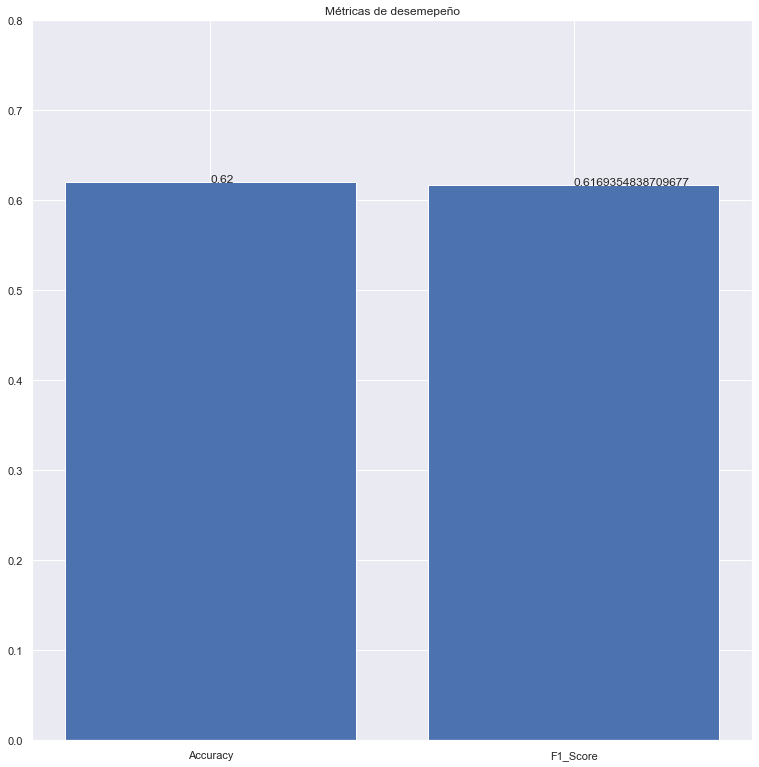

In [317]:
clf_7_accuracy = accuracy_score(y_test,clf_7_pred)
clf_7_f1_score = f1_score(y_test,clf_7_pred)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Métricas de desemepeño")
ejeX = ['Accuracy', 'F1_Score']
ejeY = [clf_7_accuracy,clf_7_f1_score]
plt.ylim(0,0.8)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [336]:
# Celda 8

# Se definen los diferentes modelos
models = {'DTC_1': DecisionTreeClassifier(max_depth = None),
          'DCT_2': DecisionTreeRegressor(max_depth = 2),
          'RLOG' : LogisticRegression()}

np.random.seed(123)
n_samples = X_train.shape[0]
n_B = 100
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B*3))])
alpha_mod = []

for j, model in enumerate(models.keys()):
   
    samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
    for i, sample in enumerate(samples):
        models[model].fit(X_train.iloc[sample,:],y_train.iloc[sample,])
        model_pred = models[model].predict(X_test)
        alpha = sum(model_pred == y_test)/y_test.shape[0]

        y_pred.iloc[:,(i+100*j)] = models[model].predict(X_test)
        alpha_mod.append(alpha)

        
alpha = np.array(alpha_mod)/sum(np.array(alpha_mod))
clf_8_pred = ((y_pred*alpha).transpose().sum() > 0.5)*1
clf_8_pred

1483    1
2185    1
2520    1
3721    1
3727    0
       ..
3077    0
5166    0
2227    1
5684    0
1937    0
Length: 1500, dtype: int32

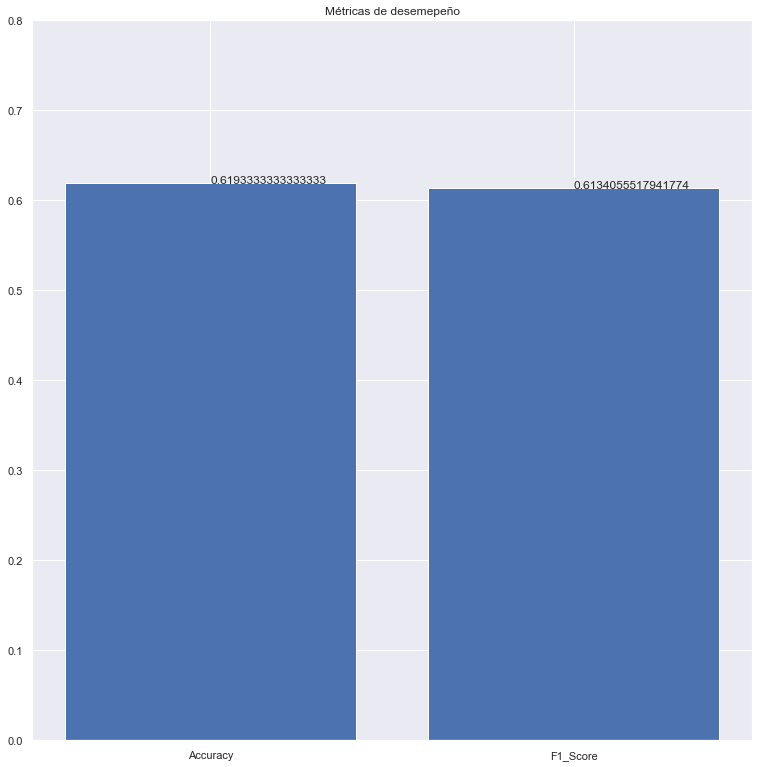

In [337]:
clf_8_accuracy = accuracy_score(y_test,clf_8_pred)
clf_8_f1_score = f1_score(y_test,clf_8_pred)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Métricas de desemepeño")
ejeX = ['Accuracy', 'F1_Score']
ejeY = [clf_8_accuracy,clf_8_f1_score]
plt.ylim(0,0.8)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9

Los resultados entre los modelos obtenidos en los puntos 8 y 9 son bastante similares, con diferencias de centésimas en las métricas de desempeño de los clasificadores. Sin embargo es importante anotar que el modelo de ponderación asigna un valor más representativo al voto de los modelos con mayor capacidad de acierto, lo cual implica un manejo más adecuado del error de predicción sobre el de votación mayoritaria.